# 1. Logistic Regression

# Self-programming code

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)
#Data là 1 chiều : số giờ học 
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
#Target: đậu 1, rớt 0
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
# Thêm x0 vào mảng và X R^20x2
X = np.concatenate((np.ones((1, 20)), X), axis = 0)

In [12]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))
def logistic_sigmoid_regression(X, y, w_init, eta):
    w = [w_init]    
    N = X.shape[1]#N=20
    d = X.shape[0]#d=2
    count = 0
    check_w_after = 20
    tol=1e-4
    max_count = 10000

    while count < max_count:
        # Dùng Stochastic Gradient Descent nên random ngẫu nhiên xi, yi
        mix_id = np.random.permutation(N)# Tạo mix để trộn 20 số
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)#R^2x1
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))# w[-1] là ma trận R^2x1 và -1 ý là lấy hàng cuối cùng 
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
w_init = np.random.randn(2, 1)
d=X.shape[0]
eta = 0.05     
w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])   

[[-4.092695  ]
 [ 1.55277242]]


In [13]:
def proba(t):
     xs_1=sigmoid(np.dot(w[-1].T, t)).reshape(-1,1)
     xs_0=1-xs_1
     return np.concatenate((xs_1,xs_0),axis=1)    
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


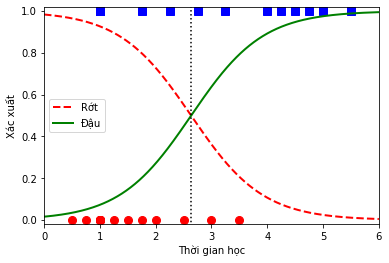

In [15]:
#Tạo xx và y_pro để vẽ đồ thị xác xuất
xx = np.linspace(0, 6, 1000)
one=np.ones((1,1000))
xx_bar=np.vstack((one,xx))
y_proba=proba(xx_bar)
#Vẽ đường ranh giới với p>=0.5 sẽ thuộc lớp 1 p<=0.5 thuộc lớp 0
w0 = w[-1][0][0]
w1 = w[-1][1][0]
boundary = -w0/w1

plt.plot(X.T[y==0], y[y==0], 'ro', markersize = 8)
plt.plot(X.T[y==1], y[y==1], 'bs', markersize = 8)
plt.plot(xx,y_proba[:,1],'r--',linewidth = 2,label="Rớt")
plt.plot(xx,y_proba[:,0], 'g-', linewidth = 2,label="Đậu")
plt.plot([boundary,boundary], [-0.2,1.2], 'k:', markersize = 8)
plt.xlabel('Thời gian học')
plt.ylabel('Xác xuất')
plt.axis([0, 6, -0.02, 1.02])
plt.legend(loc="center left")
plt.show()

# Sử dụng thư viện scikit - learn

In [5]:
from sklearn import datasets

In [6]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [7]:
 X = iris["data"][:,3:]#Lấy data thứ 3 nghĩa là chỉ lấy chiều rộng cánh hoa
 y = (iris["target"] == 2).astype(np.int)# Thay thế label 2 là 1 và còn lại là 0
 print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\Users\AM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)#lbfgs là bộ giải toán học để tối ưu thuật toán
log_reg.fit(X, y)

LogisticRegression(random_state=42)

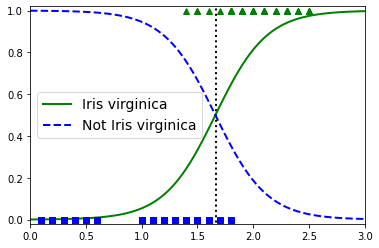

In [9]:
X_new = np.linspace(0, 3, 100).reshape(-1, 1)#Tạo X_new để vẽ hàm xác xuất sigmoid
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [16]:
decision_boundary

array([1.66666667])

In [17]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])